匯入所需套件<br>
各套件用途:<br>
&emsp;  tensorflow2.0&emsp;深度學習的框架，方便建立模型及訓練<br>
&emsp;  numpy&emsp;&emsp;&emsp;&emsp;進行矩陣運算用，python的乘法運行速度太慢<br>
&emsp;  matplotlib&emsp;&emsp;&ensp;在python中類似matlab的繪圖工具，用於數據分析<br>
&emsp;  os&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;在python中關於作業系統操作呼叫的相關模組，對檔案進行重新命名、刪除等操作<br>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, losses, optimizers, datasets
import numpy as np
import matplotlib.pyplot as plt
import pydot
import os

建立LeNet-5中較為特殊的第三層<br><br>
<img src=.\images\Untitled_1.png style="width:600px">

In [2]:
class Con_sp(tf.keras.layers.Layer):

    def __init__(self, filter_num, filter_size, **kwargs):
        super(Con_sp, self).__init__(**kwargs)
        self.filter_num = filter_num
        self.filter_size = filter_size

    def build(self, input_shape): 
        self.weights3 = tf.Variable(initial_value=tf.random.normal([self.filter_size,self.filter_size,3,6]),trainable=True,name='Weight3')
        self.weights4 = tf.Variable(initial_value=tf.random.normal([self.filter_size,self.filter_size,4,6]),trainable=True,name='Weight4')
        self.weights4_4 = tf.Variable(initial_value=tf.random.normal([self.filter_size,self.filter_size,4,3]),trainable=True,name='Weight4_4')
        self.weights6 = tf.Variable(initial_value=tf.random.normal([self.filter_size,self.filter_size,6,1]),trainable=True,name='Weight6')
        self.bias1 = tf.Variable( initial_value=tf.random.normal([self.filter_num]),trainable=True,name='Bias11')
        # self.weights1 = self.add_weight(shape=(self.filter_size,self.filter_size,6,self.filter_num),initializer='random_normal',trainable=True,name='ww11')
        # self.bias1 = self.add_weight(shape=(self.filter_num),initializer='random_normal',trainable=True,name='bb11')
        # self.shape1 = input_shape
        #相当于设置self.built = True
        super(Con_sp,self).build(input_shape)

    def call(self, inputs):
        for i in range(16):
            if i < 1:
                j=i
                basic_out = tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,0:1,0:1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1: 
                    j=0
                basic_out += tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,1:2,0:0+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1: 
                    j=0
                basic_out += tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,2:3,0:0+1],[1,1,1,1],'VALID',)
                basic_out = tf.nn.bias_add(basic_out, self.bias1[i:i+1])
                # print(basic_out.shape)
            if i>=1 and i < 6:
                j=i
                k=i
                output11 = tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,0:1,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1: 
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,1:2,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1: 
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights3[...,2:3,k:k+1],[1,1,1,1],'VALID')
                output11 = tf.nn.bias_add(output11, self.bias1[i:i+1])
                # print(output11)
                basic_out = tf.concat(axis=3,values=[basic_out,output11])
                # print(i,"和: ",basic_out.shape)
            if i >= 6 and i < 12 :
                j=i-6
                k=i-6
                output11 = tf.nn.conv2d(inputs[...,j:j+1],self.weights4[...,0:1,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4[...,1:2,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4[...,2:3,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4[...,3:4,k:k+1],[1,1,1,1],'VALID')
                output11 = tf.nn.bias_add(output11, self.bias1[i:i+1])
                # print(output11)
                basic_out = tf.concat(axis=3,values=[basic_out,output11])
                # print(i,"和: ",basic_out.shape)
            if i >= 12 and i < 15 :
                j=i-12
                k=i-12
                output11 = tf.nn.conv2d(inputs[...,j:j+1],self.weights4_4[...,0:1,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4_4[...,1:2,k:k+1],[1,1,1,1],'VALID')
                j+=2
                if (j/6) >= 1:
                    j-=6
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4_4[...,2:3,k:k+1],[1,1,1,1],'VALID')
                j+=1
                if (j/6) == 1:
                    j=0
                output11 += tf.nn.conv2d(inputs[...,j:j+1],self.weights4_4[...,3:4,k:k+1],[1,1,1,1],'VALID')
                output11 = tf.nn.bias_add(output11, self.bias1[i:i+1])
                # print(output11)
                basic_out = tf.concat(axis=3,values=[basic_out,output11])
                # print(i,"和: ",basic_out.shape)
            if i == 15 :
                output11 = tf.nn.conv2d(inputs,self.weights6,[1,1,1,1],'VALID')
                output11 = tf.nn.bias_add(output11, self.bias1[i:i+1])
                basic_out = tf.concat(axis=3,values=[basic_out,output11])
                # print(i,"和: ",basic_out.shape)
        return basic_out
    # def get_config(self):
    #     # base_config = super(Con_sp, self).get_config
    #     # config1 = {
    #     #     "filter_num":self.filter_num ,
    #     #     "filter_size":self.filter_size
    #     #     }
    #         # dict(list(base_config.items()) + list(config1.items()))
    #     return {"filter_num":self.filter_num , "filter_size":self.filter_size}
    def get_config(self):
        config = super(Con_sp, self).get_config()
        config.update({
            "filter_num":self.filter_num,
            "filter_size":self.filter_size
        })
        return config   

選擇調用GPU，讀取訓練資料集，並將其Padding為32x32，也將圖像進行歸一化。

In [3]:
devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(devices[0], True)

(train_x, train_y),(test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = 2*tf.convert_to_tensor(train_x,dtype=tf.float32)
train_x = tf.pad(train_x,[[0,0],[2,2],[2,2]],"CONSTANT",0) # 外圍填充
train_x = train_x / 255 # 圖像歸一化 0~1
train_x = tf.expand_dims(train_x,-1)
train_y = tf.one_hot(train_y, depth=10)

test_x = 2*tf.convert_to_tensor(test_x,dtype=tf.float32)
test_x = tf.pad(test_x,[[0,0],[2,2],[2,2]],"CONSTANT",0) # 外圍填充
test_x = test_x / 255 # 圖像歸一化 0~1
test_x = tf.expand_dims(test_x,-1)
test_y = tf.one_hot(test_y, depth=10)

利用Tensorflow的Funtion API建立模型架構
由兩個卷積層、兩個池化層以及三層全連接層構成

In [4]:
model_input = layers.Input(shape=(32,32,1))
x = layers.Conv2D(6,kernel_size=5,strides=1)(model_input)
x = layers.Activation('relu')(x)
x = layers.AveragePooling2D(pool_size=2,strides=2)(x)
x = Con_sp(filter_num=16,filter_size=5)(x)
x = layers.Activation('relu')(x)
x = layers.AveragePooling2D(pool_size=2,strides=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(120,activation='relu')(x)
x = layers.Dense(84,activation='relu')(x)
model_output = layers.Dense(10,activation='softmax')(x)

建立模型並檢查架構是否正確

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 activation (Activation)     (None, 28, 28, 6)         0         
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 con_sp (Con_sp)             (None, 10, 10, 16)        1516      
                                                                 
 activation_1 (Activation)   (None, 10, 10, 16)        0         
                                                             

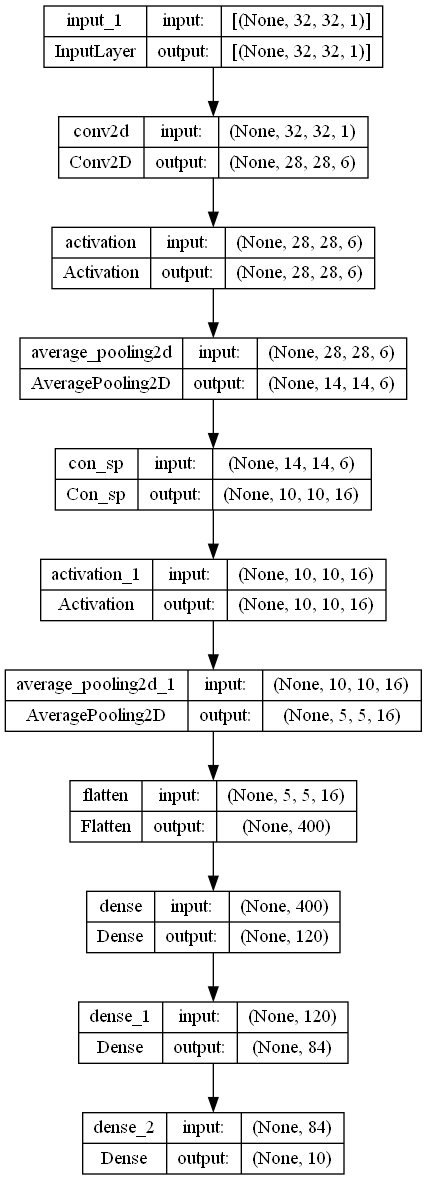

In [5]:
model = tf.keras.Model(inputs=model_input,outputs=model_output)
model.build(input_shape=(None,32,32,1))
model.summary() # 看建立的架構
tf.keras.utils.plot_model(model, to_file="my_first_model_with_shape_info.png", show_shapes=True)

In [7]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"]) # 定義所要採用的loss funtion, optimizer, metrics
history = model.fit(x=train_x,y=train_y,batch_size=320,epochs=10,verbose=1,validation_split=0.1) # 設定 batch(批), epochs(跌代), verbose, validation(驗證，功能還不太確定)

Epoch 1/10
3375/3375 [==============================] - 72s 18ms/step - loss: 0.1787 - accuracy: 0.9458 - val_loss: 0.0724 - val_accuracy: 0.9790
Epoch 2/10
3375/3375 [==============================] - 60s 18ms/step - loss: 0.0742 - accuracy: 0.9777 - val_loss: 0.0685 - val_accuracy: 0.9800
Epoch 3/10
3375/3375 [==============================] - 59s 18ms/step - loss: 0.0538 - accuracy: 0.9829 - val_loss: 0.0455 - val_accuracy: 0.9858
Epoch 4/10
3375/3375 [==============================] - 58s 17ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0487 - val_accuracy: 0.9865
Epoch 5/10
3375/3375 [==============================] - 59s 17ms/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.0472 - val_accuracy: 0.9868
Epoch 6/10
3375/3375 [==============================] - 59s 17ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0481 - val_accuracy: 0.9877
Epoch 7/10
3375/3375 [==============================] - 59s 18ms/step - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0521 -

繪製訓練過程曲線

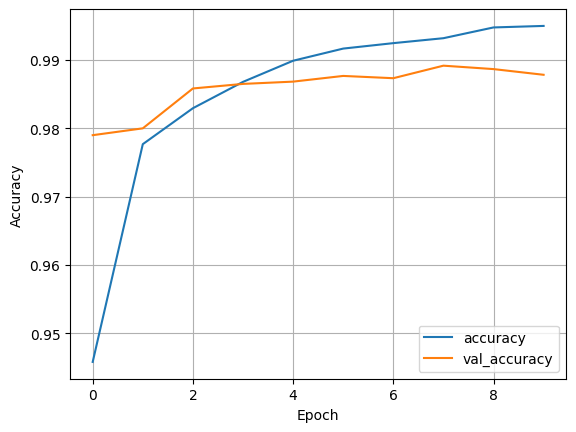

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

以test data來評估訓練準確度

In [9]:

score = model.evaluate(test_x,test_y) #評估誤差
print("Test Loss: " ,score[0])
print("Test Accuracy: ",score[1])

result = model.predict(test_x[0:9])
print('前9筆預測結果: ',np.argmax(result, axis=-1),'\n')
print('前9筆實際值: ',np.argmax(test_y[0:9],axis=-1),'\n')

313/313 [==============================] - 3s 7ms/step - loss: 0.0555 - accuracy: 0.9860
Test Loss:  0.05545125901699066
Test Accuracy:  0.9860000014305115
1/1 [==============================] - 1s 880ms/step
前9筆預測結果:  [7 2 1 0 4 1 4 9 5] 

前9筆實際值:  [7 2 1 0 4 1 4 9 5] 



儲存模型

In [13]:
model.save('./CNN_MODEL')
model.save('./CNN_MODEL.h5')

INFO:tensorflow:Assets written to: ./CNN_MODEL\assets


INFO:tensorflow:Assets written to: ./CNN_MODEL\assets
